In [ ]:
import numpy as np # библиотека для работы с чиселками
import pandas as pd # data processing, работа с CSV файлами
import matplotlib.pyplot as plt # для графики

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

Откроем датасет и посмотрим первые 5 его строчек

In [2]:
dataset = pd.read_excel('..\\..\\tasks\\lab2\\dataset\\lab2-07.xlsx', header=None)
dataset.head(5)

,0,1
0,0.000000,1.000000
1,-7.958362,-2.351256
2,8.634859,-5.964015
3,4.144489,10.308631
4,3.453995,9.806138


### Посмотрим датасет

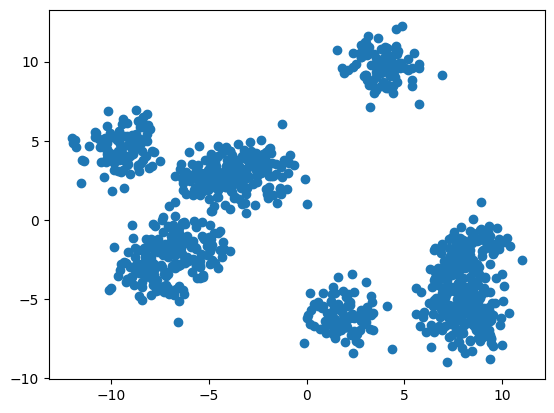

In [3]:
plt.scatter(dataset[0], dataset[1])

Как видно из диаграммы рассеяния, данные представляют собой 6 кластеров. 

### Подготовим данные

Поскольку кластеризация - обучение без учителя, где нет заранее известных ответов, деление на обучающую и тестовую выборки не требуется

### Посмотрим на работу KMeans

In [15]:
model = KMeans(n_clusters=6)
labels = model.fit_predict(dataset)

print("Центры кластеров:")
print(model.cluster_centers_)

Центры кластеров:
[[ 3.8836347   9.74621748]
 [ 1.84048147 -6.02866513]
 [-3.73842456  2.87161471]
 [ 8.09870521 -4.35008804]
 [-6.99449023 -2.33619104]
 [-9.43371626  4.56758048]]


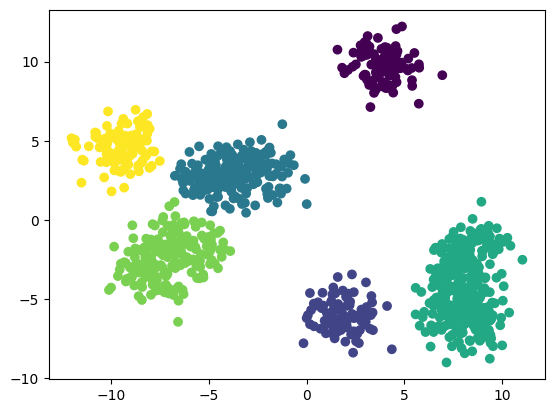

In [16]:
plt.scatter(dataset[0].to_frame(), dataset[1].to_frame(), c=model.labels_)

Оценим работу

Т. к. мне было несколько лень вручную размечать датасет на кластеры, можно оценить работу модели визуально. Как видно из диаграммы выше, алгоритм прекрасно справился со своей задачей на заданном наборе данных.

### Вывод:
Как видно из диаграммы рассеяния, KMeans хорошо подходит для данного набора данных.

### Другой алгоритм кластеризации

Попробуем DBSCAN

In [18]:
from sklearn.cluster import DBSCAN

In [38]:
clustering = DBSCAN(eps=1.5, min_samples=5)
labels = clustering.fit_predict(dataset)

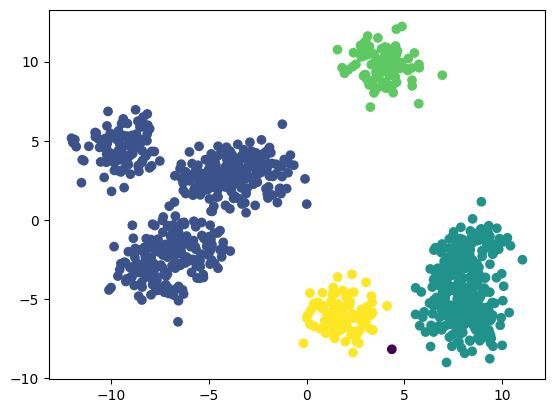

In [39]:
plt.scatter(dataset[0].to_frame(), dataset[1].to_frame(), c=labels)

Результат не очень хороший, 3 кластера слева объединились в один. Попробуем подогнать радиус поиска eps

In [40]:
clustering = DBSCAN(eps=0.5, min_samples=5)
labels = clustering.fit_predict(dataset)

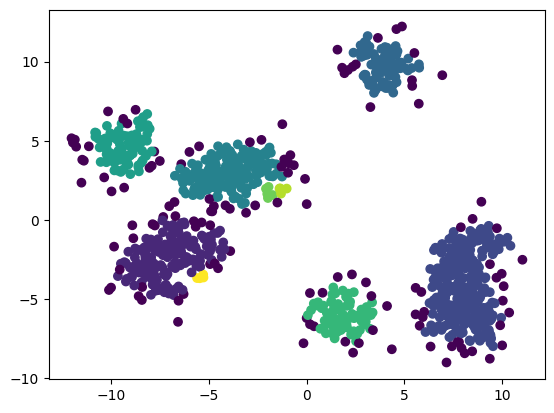

In [41]:
plt.scatter(dataset[0].to_frame(), dataset[1].to_frame(), c=labels)

Получилось 9 кластеров и множество нераспознанных точек (самые темные по периметру кластеров) - слишком маленький радиус

In [48]:
clustering = DBSCAN(eps=0.8, min_samples=5)
labels = clustering.fit_predict(dataset)

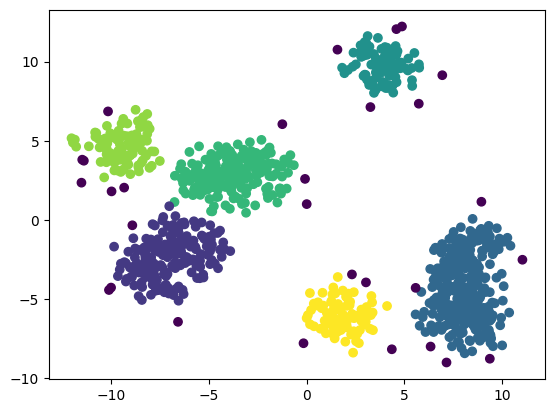

In [49]:
plt.scatter(dataset[0].to_frame(), dataset[1].to_frame(), c=labels)

Неплохой результат. Видны 6 кластеров и всего лишь 29 выбросов (из 1000 елементов)

Оценим работу

С DBCSCAN пришлось подольше поработать, чем с KMeans, чтобы настроить параметры под данный датасет, и результат оказался менее удовлетворительным.

### Вывод:
Как видно из диаграмм рассеяния, метод KMeans лучше работает с предоставленными данными. Данному алгоритму достаточно просто указать количество желаемых кластеров и он самостоятельно их найдет. Правда, возможны проблемы пересекаюшимися кластерами, ведь очень трудно понять, к какому кластеру отнести объект посередине, но в моем случае такого не было. DBSCAN, наверное, справился бы лучше с такой задачей, но в данной показал себя не очень перспективно.